## **2주차 과제**
- Colab 환경에서는 마크다운 셀의 보이지 않을 수 있으니, VS Code 등의 로컬환경을 사용하시거나 참고이미지 폴더의 파일들을 참고하시길 바랍니다.
- 문제에 대한 전체 풀이는 하나의 ipynb 파일로 제출해주셔야 합니다. 해당 사항을 준수하지 않을 경우, 채점에서 0점으로 처리될 수 있습니다.

## **과제 안내**
가. 총점: 100점 (문항당 10점 × 10문항)
나. 채점 기준:
- 부분 점수는 제공되지 않습니다.
- 다양한 코드 작성 방식을 존중하며, 문제에서 요구한 조건을 충족하고 출력 결과가 동일한 경우 정답으로 인정됩니다.

---
## Q1. 데이터 전처리 - 결측치

- 과제 내용
    - 결측치 제거 수행 이전과 이후의 결측치 정보 출력

- 참고자료
    - 3-10 values & NA .ipynb

- 별도의 정렬 조건은 없습니다.

In [1]:
# 데이터 불러오기 및 확인용 코드 셀입니다. 참고용으로만 활용하셔도 됩니다.
import pandas as pd

order_df = pd.read_csv('eda_order.csv')
print('='*25, 'eda_order.csv 정보입니다', '='*25)
display(order_df)

========================= eda_order.csv 정보입니다 =========================


,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13
...,...,...,...,...,...,...,...
4995,2695.0,99.0,7.0,2023-02-27,46.0,0.313272,NaN
4996,3166.0,552.0,7.0,2023-02-26,46.0,0.056302,NaN
4997,3092.0,149.0,7.0,2023-02-20,58.0,0.142290,2023-02-22
4998,3700.0,620.0,7.0,2023-02-21,36.0,0.119259,2023-02-21


<img src="./참고이미지/Q1/Q1_img1.png" width="50%">

In [2]:
print('='*25, '결측치 제거 이전', '='*25)

''' 정보 확인을 위한 코드를 작성해주세요 '''
print(order_df.info())

========================= 결측치 제거 이전 =========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   float64
 1   user_id         5000 non-null   float64
 2   product_id      5000 non-null   float64
 3   order_date      5000 non-null   object 
 4   quantity        5000 non-null   float64
 5   discount_ratio  5000 non-null   float64
 6   pay_date        3738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB
None


<img src="./참고이미지/Q1/Q1_img2.png" width="50%">

In [3]:
# 결측치 제거를 수행하고, 데이터프레임 정보를 출력해주세요

print('='*25, '결측치 제거 이후', '='*25)
result = order_df.dropna()

print(result.info())

========================= 결측치 제거 이후 =========================
<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        3738 non-null   float64
 1   user_id         3738 non-null   float64
 2   product_id      3738 non-null   float64
 3   order_date      3738 non-null   object 
 4   quantity        3738 non-null   float64
 5   discount_ratio  3738 non-null   float64
 6   pay_date        3738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 233.6+ KB
None


<img src="./참고이미지/Q1/Q1_img3.png" width="40%">

---
# Q2. 유저별로 첫 방문일자와 최근 방문일자 확인

- 참고자료
    - 3-07 groupby.ipynb

- 별도의 정렬 조건은 없습니다.

In [4]:
# 데이터 불러오기 및 확인용 코드셀입니다. 참고용으로만 활용하셔도 됩니다.

visit_df = pd.read_csv('eda_visit.csv') # eda_visit.csv 파일 불러오기
display(visit_df)

,user_id,source,campaign,timestamp
0,1017.0,NaN,NaN,2022-12-15 13:06:36.361808000
1,1017.0,NaN,NaN,2023-02-20 02:46:59.416083200
2,1017.0,b,campaign_8,2023-02-08 13:10:49.026771200
3,1398.0,b,campaign_6,2023-01-07 06:37:27.756224000
4,1398.0,NaN,NaN,2023-01-19 00:49:56.166291200
...,...,...,...,...
2214,19.0,NaN,NaN,2022-12-31 02:33:28.486646400
2215,19.0,NaN,NaN,2023-04-19 06:42:09.471859200
2216,19.0,NaN,NaN,2023-01-20 02:39:59.212771200
2217,868.0,NaN,NaN,2023-01-08 04:00:25.681513600


<img src="./참고이미지/Q2/Q2_img1.png" width="50%">

- 집계함수를 활용하여 첫 방문일자와, 마지막 방문일자 확인

In [5]:
# 집계를 위한 코드를 작성해주세요

visit_df['timestamp'] = pd.to_datetime(visit_df['timestamp'])

visit_summary = visit_df.groupby('user_id').agg(
    first_date=('timestamp', 'min'),
    recent_date=('timestamp', 'max')
).reset_index()

display(visit_summary)


,user_id,first_date,recent_date
0,2.0,2022-11-18 13:32:19.457043200,2023-04-04 18:35:23.424323200
1,4.0,2023-01-20 05:48:04.159916800,2023-02-16 17:37:50.886953600
2,5.0,2023-01-24 05:33:01.551558400,2023-01-24 05:33:01.551558400
3,6.0,2022-12-24 21:35:51.627040000,2023-03-16 22:33:14.782166400
4,7.0,2022-12-23 08:13:26.529830400,2023-01-04 11:38:32.537126400
...,...,...,...
714,1486.0,2022-11-15 14:28:22.264838400,2023-04-27 19:55:14.478800000
715,1488.0,2022-11-08 13:44:49.606659200,2023-04-14 07:36:10.313782400
716,1492.0,2023-02-04 06:25:28.477433600,2023-03-04 07:00:51.261228800
717,1494.0,2023-02-11 09:16:39.744742400,2023-04-11 04:13:27.064892800


<img src="./참고이미지/Q2/Q2_img2.png" width="50%">

---
# Q3. 유저별 서비스 이용기간 확인

- 참고자료
    - 2.파이썬 날짜와시간.ipynb
    - 5-02_conversion window.ipynb
- 데이터 : eda_visit.csv

- Q2에서 문제를 해결하지 못하여 데이터프레임을 만들지 못한 경우,  
"참고데이터" 폴더의 "result_Q2.csv" 파일을 활용하시길 바랍니다.

- 해당 방식을 활용할 경우
    - Q2 : 오답
    - Q3 : result_Q2.csv을 활용하여 올바르게 풀었을 경우, 정답

- 1단계 : 데이터 자료형 확인

In [6]:
# 자료형 확인을 위한 코드를 작성해주세요

import pandas as pd

file = pd.read_csv('result_Q2.csv')
display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      719 non-null    float64
 1   first_date   719 non-null    object 
 2   recent_date  719 non-null    object 
dtypes: float64(1), object(2)
memory usage: 17.0+ KB


None

<img src="./참고이미지/Q3/Q3_img1.png" width="50%">

- 2단계 : 날짜형으로 자료형 변경  
- 위에서 확인한 자료형 중에서 _date가 object로 되어있어 변환이 필요해 보임

In [7]:
# 자료형 변환을 위한 코드를 작성해주세요

date_cols = [col for col in file.columns if col.endswith('_date')]

print("변환 대상 날짜 컬럼:", date_cols)

for col in date_cols:
    file[col] = pd.to_datetime(file[col], errors='coerce')

display(file.info())


변환 대상 날짜 컬럼: ['first_date', 'recent_date']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      719 non-null    float64       
 1   first_date   719 non-null    datetime64[ns]
 2   recent_date  719 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 17.0 KB


None

<img src="./참고이미지/Q3/Q3_img2.png" width="50%">

- 3단계 : 연산을 통해, service_period 컬럼 생성
- 처음 사용 일자와 마지막 사용일자를 활용하면, 서비스 이용기간을 구할 수 있습니다.
- service_period를 기준으로 내림차순으로 데이터를 정렬합니다.

In [8]:
# service_period 컬럼을 구하기 위한 코드를 작성해주세요

file['service_period'] = (file['recent_date'] - file['first_date']).dt.total_seconds() / 86400

file_sorted = file.sort_values(by='service_period', ascending=False)

display(file_sorted)


,user_id,first_date,recent_date,service_period
262,546.0,2022-11-18 18:09:06.901977600,2023-05-23 23:09:39.627158400,186.208712
661,1365.0,2022-10-07 14:14:09.752329601,2023-04-07 18:13:20.279174400,182.166094
675,1396.0,2022-11-20 07:17:20.257548800,2023-05-19 21:14:13.673203200,180.581174
699,1448.0,2022-11-20 02:07:35.142374400,2023-05-18 16:01:41.751561600,179.579243
114,240.0,2022-10-09 09:10:37.274332800,2023-04-04 07:01:03.403747200,176.910025
...,...,...,...,...
41,91.0,2023-02-06 09:30:57.346563200,2023-02-06 09:30:57.346563200,0.000000
691,1428.0,2023-01-11 05:30:54.678041600,2023-01-11 05:30:54.678041600,0.000000
42,93.0,2022-12-19 13:47:24.524448000,2022-12-19 13:47:24.524448000,0.000000
9,17.0,2023-02-22 05:00:49.151046400,2023-02-22 05:00:49.151046400,0.000000


<img src="./참고이미지/Q3/Q3_img3.png" width="50%">

---
# Q4. 서비스 이용기간 분포 시각화

- 참고자료
    - 4-03 histogrem, add_vline_annotation, update_xaxes.ipynb

In [9]:
# Q3에서 만든 데이터입니다.

display(file_sorted)

,user_id,first_date,recent_date,service_period
262,546.0,2022-11-18 18:09:06.901977600,2023-05-23 23:09:39.627158400,186.208712
661,1365.0,2022-10-07 14:14:09.752329601,2023-04-07 18:13:20.279174400,182.166094
675,1396.0,2022-11-20 07:17:20.257548800,2023-05-19 21:14:13.673203200,180.581174
699,1448.0,2022-11-20 02:07:35.142374400,2023-05-18 16:01:41.751561600,179.579243
114,240.0,2022-10-09 09:10:37.274332800,2023-04-04 07:01:03.403747200,176.910025
...,...,...,...,...
41,91.0,2023-02-06 09:30:57.346563200,2023-02-06 09:30:57.346563200,0.000000
691,1428.0,2023-01-11 05:30:54.678041600,2023-01-11 05:30:54.678041600,0.000000
42,93.0,2022-12-19 13:47:24.524448000,2022-12-19 13:47:24.524448000,0.000000
9,17.0,2023-02-22 05:00:49.151046400,2023-02-22 05:00:49.151046400,0.000000


<img src="./참고이미지/Q4/Q4_img1.png" width="50%">

- 히스토그램 시각화
    - 막대는 20개로 설정
    - "service_period"에 대한 히스토그램 시각화를 진행합니다.

- 시각화에서 "색상", "x축 이름 및 범위", "y축 이름 및 범위"는 별도의 조건 없습니다.

In [10]:
import plotly.express as px

# 히스토그램 시각화를 위한 코드를 작성해주세요
fig = px.histogram(file_sorted, x = 'service_period', nbins = 20)
fig.show()

<img src="./참고이미지/Q4/Q4_result_1.png" width="90%">

---
# Q5. quantity 상위 5개 product 확인

- 데이터
    - eda_order.csv

- 참고자료
    - 4-04 pie.ipynb

In [11]:
# 데이터 읽기 및 확인용 코드 셀입니다. 참고용으로만 활용하셔도 됩니다.

import pandas as pd

order_df = pd.read_csv('eda_order.csv')
print('='*25, 'eda_order.csv 파일입니다', '='*25)
display(order_df.head())

========================= eda_order.csv 파일입니다 =========================


,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13


<img src="./참고이미지/Q5/Q5_img1.png" width="50%">

- product_id를 기준으로 quantity에 대해 sum() 집계를 수행합니다.
- 별도의 정렬 조건은 없습니다.

In [12]:
# 해당 출력을 위한 코드를 작성해주세요

result = order_df.groupby('product_id').agg(
    quantity = ('quantity', 'sum')
).reset_index()

display(result)

,product_id,quantity
0,1.0,3285.0
1,2.0,963.0
2,3.0,1626.0
3,4.0,1361.0
4,5.0,1745.0
5,6.0,1844.0
6,7.0,4702.0
7,8.0,1406.0
8,9.0,2765.0
9,10.0,902.0


<img src="./참고이미지/Q5/Q5_img2.png" width="50%">

In [13]:
# quantity 상위 5개 데이터를 확인해주세요

result = result.sort_values('quantity', ascending=False)
display(result.head())

,product_id,quantity
19,20.0,6871.0
6,7.0,4702.0
0,1.0,3285.0
8,9.0,2765.0
5,6.0,1844.0


<img src="./참고이미지/Q5/Q5_img3.png" width="50%">

- 이름은 product_id, 값에는 quantity, 제목은 Quantity top5 product로 설정했습니다.
- 색상, 소수점 자릿수에 대한 별도의 조건은 없습니다.

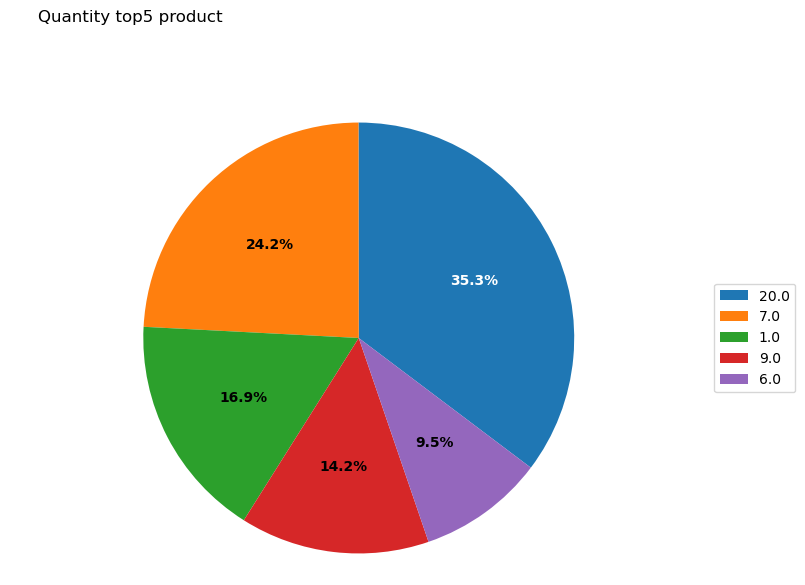

In [14]:
# 해당 시각화를 위한 코드를 작성해주세요
import matplotlib.pyplot as plt

# 상위 5개 데이터
result2 = result.head()

sizes = result2['quantity']
labels = result2['product_id']

plt.figure(figsize=(9, 6))

patches, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=-37
)

for i, at in enumerate(autotexts):
    if i == 0:
        at.set_color('white')
        at.set_fontweight('bold')
    else:
        at.set_color('black')
        at.set_fontweight('bold')

plt.title(
    "Quantity top5 product",
    loc='left',
    x=0.04,      
    y=1.15       
)

plt.legend(
    patches,
    labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.axis('equal')

plt.subplots_adjust(top=0.9)

plt.show()



<img src="./참고이미지/Q5/Q5_result_1.png" width="90%">

---
# Q6. 분류별 발생건수 집계

- 데이터 읽기 data_2 폴더, 한국도로공사_로드킬 데이터 정보_20231231.csv
- 본부명, 지사명, 노선명을 기준으로 발생건수를 차례로 집계 및 상위 5개 출력

In [15]:
# 데이터 읽기 및 확인용 코드 셀입니다. 참고용으로만 활용하셔도 됩니다.

import pandas as pd

df = pd.read_csv('한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')

- 셀 출력은 본부명, 지사명, 노선명별로 [발생건수] 집계를 수행하고 내림차순으로 정렬해주세요

In [16]:
# 집계를 위한 코드를 작성해주세요
result = df.groupby('본부명').agg(
    발생건수 = ('발생건수', 'sum')
).reset_index()

display(result.sort_values('발생건수', ascending=False).head())


result = df.groupby('지사명').agg(
    발생건수 = ('발생건수', 'sum')
).reset_index()

display(result.sort_values('발생건수', ascending=False).head())


result = df.groupby('노선명').agg(
    발생건수 = ('발생건수', 'sum')
).reset_index()

display(result.sort_values('발생건수', ascending=False).head())




,본부명,발생건수
7,충북,79
3,대전충남,66
6,전북,49
0,강원,44
1,광주전남,38


,지사명,발생건수
19,진천,45
9,부안,34
22,함평,25
23,홍천,25
10,부여,21


,노선명,발생건수
13,중부선,91
9,서해안선,58
4,당진대전선,26
8,서천공주선,21
11,영동선,13


<img src="./참고이미지/Q6/Q6_img1.png">

---
# Q7. 함수 선언 - 데이터 검색

In [17]:
# 데이터 확인용 코드셀입니다. 참고용으로만 활용하셔도 괜찮습니다.

import pandas as pd

df = pd.read_csv('한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')
display(df.head())

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370


<img src="./참고이미지/Q7/Q7_img1.png" width="90%">

- 함수 이름 filter_func
    - 지사 정보 검색 결과를 차례대로 출력하는 함수를 선언합니다.
    - 데이터 정렬 기준은 발생건수 기준으로 출력합니다.
    - 각 결과는 최대 상위 5개 행만 출력합니다.

- 함수 실행 시에
    - data에는 데이터프레임을 입력합니다
    - brach_list에는 지사명을 리스트형으로 입력합니다.
    - brach_col에는 지사명에 해당하는 "컬럼명"을 입력합니다.
    - sort_col은 집계의 기준이 되는 "컬럼명"을 입력합니다.  

In [18]:
def filter_func(data, branch_list, branch_col, sort_col):
    for branch in branch_list:
        
        filtered = data[data[branch_col] == branch]
        
        filtered = filtered.sort_values(by=sort_col, ascending=False)
        
        display(filtered.head(5))


- ['화성', '시흥', '경기광주']에 대한 정보 출력
- 함수에 대한 값 입력 방식은 동일해야 합니다.

In [19]:
# 위에서 선언한 함수를 실행해주세요
# 위의 코드셀에서 함수 선언에 대한 코드를 작성하고, 해당 셀에서는 별도의 추가 코드 없이 셀을 그대로 실행해주시길 바랍니다.

filter_func(data = df,
            branch_list = ['화성', '시흥', '경기광주'],
            branch_col = '지사명',
            sort_col = '발생건수')

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
5,서울경기,경기광주,중부선,345~350,통영,345,3,37.397767,127.310793
6,서울경기,경기광주,중부선,320~325,통영,320,3,37.207765,127.442214


<img src="./참고이미지/Q7/Q7_result_1.png" width="50%">

---
# Q8.서울본부 지사들의 발생건수 시각화

- 참고자료
    - 08_pandas.ipynb

- 서울경기 본부의 사고 발생건수 시각화
- 본부명 중에서, [서울경기] 데이터만 선택
- 문제에서의 그림은 seaborn 라이브러리를 통해 작성함, 기본 집계설정(=평균) 적용

- 시각화에서 "색상", "x축 이름 및 범위", "y축 이름 및 범위"에 별도의 조건은 없습니다.
- 한글 시각화에서 글자가 깨지는 현상이 반복될 경우, 한글 시각화에 필요한 코드를 적어두시기 바랍니다.
- 경기 광주에서 검정색 세로 막대는 기본 설정일 때 자동으로 출력된 것으로, 별도로 신경쓰지 않으셔도 괜찮습니다.

===================== 서울경기 본부 정보입니다 =====================


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
5,서울경기,경기광주,중부선,345~350,통영,345,3,37.397767,127.310793
6,서울경기,경기광주,중부선,320~325,통영,320,3,37.207765,127.442214


===================== 서울경기 시각화 결과입니다 =====================


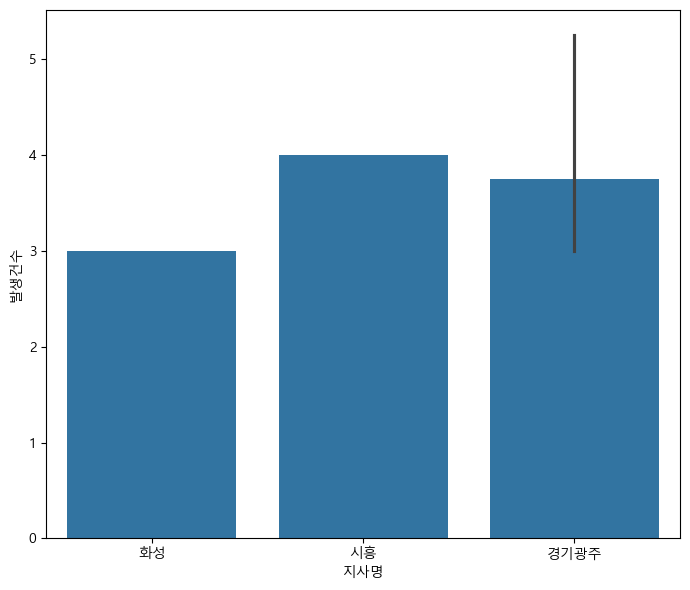

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 본부 중에서, 서울 경기 데이터만 선택합니다.
# 서울경기 데이터에서, 지사명 별로 발생건수를 시각화합니다.

''' 코드를 작성해주세요 '''
print("=" * 21, "서울경기 본부 정보입니다", "=" * 21)
display(df.head(7))

df_seoul_gyeonggi = df[df['본부명'] == '서울경기']

plt.figure(figsize=(7, 6))
sns.barplot(data=df_seoul_gyeonggi, x='지사명', y='발생건수')

plt.xlabel("지사명")
plt.ylabel("발생건수")

plt.tight_layout()

print("=" * 21, "서울경기 시각화 결과입니다", "=" * 21)
plt.show()


<img src="./참고이미지/Q8/Q8_result_1.png" width="90%">

---
# Q9. 함수 선언

- 참고자료
    - 1.파이썬 문법.ipynb : def

- 입력변수 : 데이터프레임
- 문제에서의 그림은 seaborn 라이브러리를 통해 작성함, 기본 집계설정(=평균) 적용

- 함수 선언, 함수 이름은 자유롭게 정의
    - (1) input()을 통해 본부명 입력받기
    - (2) 해당 본부 지사의 발생건수 bar 차트 시각화
    - (3) 존재하지 않는 본부면 "XX 본부는 존재하지 않습니다." 출력
    - (4) 올바른 본부명을 입력하기 전까지는 함수 계속 실행, 어떤 반복문이 적합할지 고민해보세요(for, while)

In [21]:
# 데이터 읽기 및 확인용 코드셀입니다. 참고용으로만 사용하셔도 괜찮습니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

print('='*25, '한국도로공사_로드킬 데이터 정보_20231231.csv 데이터입니다', '='*25)
df = pd.read_csv('한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')

display(df)

========================= 한국도로공사_로드킬 데이터 정보_20231231.csv 데이터입니다 =========================


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
...,...,...,...,...,...,...,...,...,...
82,광주전남,함평,서해안선,35~40,서울,35,3,35.109966,126.481287
83,광주전남,함평,서해안선,55~60,서울,55,3,35.273296,126.543684
84,대구경북,고령,광주대구선,165~170,광주,165,5,35.753698,128.359582
85,부산경남,창원,남해1지선,0~5,함안,0,3,35.271400,128.474403


<img src="./참고이미지/Q9/Q9_img1.png">

In [22]:
def multi_center_bar_func(data, center_col, branch_col, accident_num_col, center_list):
    ''' 코드를 작성해주세요 '''
    
    while True:
        center_input = input("본부명을 입력하세요: ").strip()
        
        if center_input not in df[center_col].unique():
            print(f"{center_input} 본부는 존재하지 않습니다.")
            print("다시 입력하세요")
            continue

        center_data = df[df[center_col] == center_input]

        print(f"{center_input} 본부 지사 정보")
        plt.figure(figsize=(10,6))
        sns.barplot(data=center_data, x=branch_col, y=accident_num_col)
        plt.title(f"{center_input} 본부 지사별 발생건수")
        plt.tight_layout()
        plt.show()
        break
        


- 시각화에서 "색상", "x축 이름 및 범위", "y축 이름 및 범위"에 별도의 조건은 없습니다.
- 한글 시각화에서 글자가 깨지는 현상이 반복될 경우, 한글 시각화에 필요한 코드를 적어두시기 바랍니다.
- 경기 광주에서 검정색 세로 막대는 기본 설정일 때 자동으로 출력된 것으로, 별도로 신경쓰지 않으셔도 괜찮습니다.
- 함수에서 값 입력 방식은 동일하게 이루어져야 합니다.

서울 본부는 존재하지 않습니다.
다시 입력하세요
서울경기 본부 지사 정보


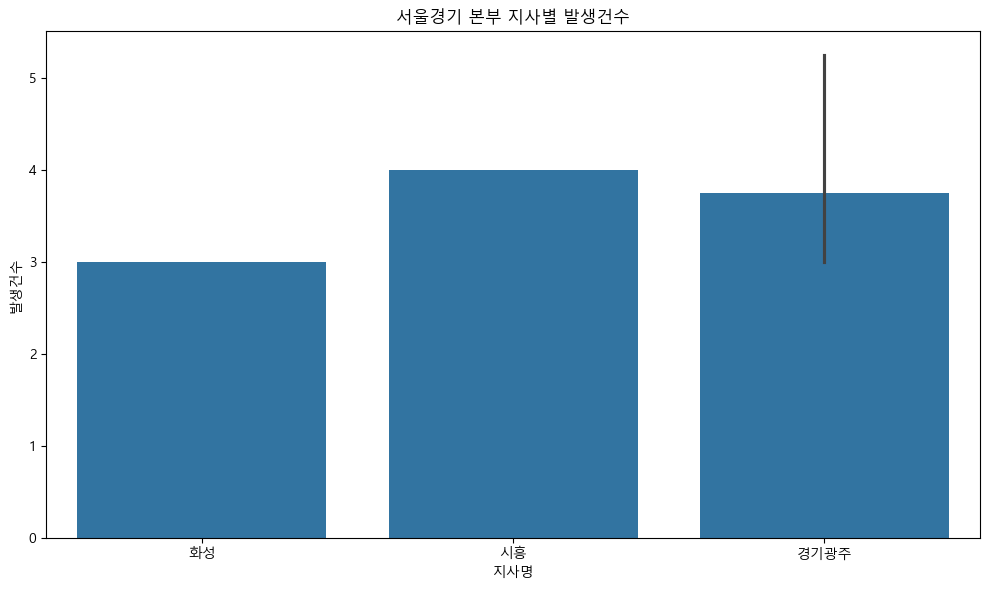

In [23]:
# 위에서 선언한 함수를 실행해주세요

tmp_center_list = ['서울경기', '강원', '충북', '대전충남', '광주전남', '전북', '부산경남', '대구경북']

multi_center_bar_func(data = df,
                      center_col = '본부명',
                      branch_col = '지사명',
                      accident_num_col = '발생건수',
                      center_list = tmp_center_list)

<img src="./참고이미지/Q9/Q9_img2.png" width="90%">

---
# Q10. 지도 시각화 - 서울경기 본부 중 발생건수 가장 많은 지사

- 별도의 조건이 없다면, 시각화에서 "색상", "x축 이름 및 범위", "y축 이름 및 범위"는 default 설정으로 둡니다.

In [24]:
# 본부명 중에서, [서울경기] 데이터만 선택
# 발생 건수 내림차순 기준으로 데이터를 정렬합니다.
# 가장 상단에 위치한 지사를 folium map에 표시

import folium

# 본부명 중에서 "서울경기"만 선택하고 발생건수가 많은 순서대로 출력해주세요

seoul = df[df['본부명'] == '서울경기']
result = seoul.sort_values('발생건수', ascending=False).reset_index()

print('='*25, '본부명 중에서 "서울경기"만 선택한 결과입니다.', '='*25)

display(result[['본부명', '지사명', '노선명', '방향', '발생건수', '위도', '경도']])

========================= 본부명 중에서 "서울경기"만 선택한 결과입니다. =========================


,본부명,지사명,노선명,방향,발생건수,위도,경도
0,서울경기,경기광주,중부선,통영,6,37.248957,127.421370
1,서울경기,시흥,수도권제1순환선,판교,4,37.419086,126.828963
2,서울경기,화성,서해안선,목포,3,37.217471,126.871994
3,서울경기,화성,서해안선,서울,3,37.217471,126.871994
4,서울경기,경기광주,중부선,하남,3,37.248957,127.421370
5,서울경기,경기광주,중부선,통영,3,37.397767,127.310793
6,서울경기,경기광주,중부선,통영,3,37.207765,127.442214


<img src="./참고이미지/Q10/Q10_img1.png" width="50%">

In [25]:
# 발생건수가 가장 많은 데이터의 위치를 표시해주세요

print('='*25, 'Folium Map을 통해 시각화한 결과입니다.', '='*25)

top_branch = result.iloc[0]

# Folium 지도 생성
m = folium.Map(location=[top_branch['위도'], top_branch['경도']], zoom_start=12)

# 마커 추가
folium.Marker(
    location=[top_branch['위도'], top_branch['경도']],
    popup=f"{top_branch['지사명']} ({top_branch['발생건수']}건)"
).add_to(m)

# 마지막 줄에 m만 적으면 Jupyter Notebook에서 바로 지도 출력
m

========================= Folium Map을 통해 시각화한 결과입니다. =========================


<img src="./참고이미지/Q10/Q10_img2.png" width="90%">

## **🔎 [주관식 과제 수행 시 유의사항]**

> **✅ 1. 정확한 출력값과 요구사항 이행 필수**  

주관식 채점은 다음 기준에 따라 평가됩니다.

1)출력 결과의 정확성  
- 제공된 예시 결과와 동일한 출력이 나와야 합니다.  
- 단, 실시간 데이터나 인공지능 학습 등으로 출력값에 변동성이 존재할 수 있는 문제는 예외로 처리합니다.  

2)문제 요구사항의 충실한 반영  
- 조건, 컬럼명, 출력 형식 등 모든 요구사항을 빠짐없이 반영해야 합니다.  
- 사소한 조건도 놓치지 않도록 세심하게 코드를 작성해 주세요.  


> **✅ 2. 완성된 코드 제출 필수**

가. 제출한 코드 셀은 채점 시 직접 실행하여 결과를 확인할 수 있습니다.  

- 재실행 시에도 동일한 결과가 나와야 정답으로 인정됩니다.  

나. 버전 차이에 따른 미세한 수치 차이는 감안하나, 결과 형태나 구조가 다르면 감점 또는 오답 처리될 수 있습니다.  

다. 시각화 문제에서 색상 지정이 없다면, 기본(default) 색상 사용을 전제로 합니다.  
- 환경에 따라 색상이 다르게 출력되더라도 불이익은 없습니다.  

> **✅ 3. 사용자 선언 함수/클래스 문제 주의사항**

사용자 정의 함수, 클래스, 메서드와 관련된 문제에서는 추가적인 코드 없이도 함수만으로 정답 결과가 도출되어야 합니다.  
- ❌ 함수 외부에서 plt.title, print, info() 등을 추가하여 결과를 보완하면 오답 처리됩니다.  

> **✅ 4. 함수/클래스 선언 시 일관된 결과 유지**

가. 함수, 클래스, 메서드는 반복 실행 시에도 항상 동일한 결과를 반환해야 합니다.  
나. 채점 중 재실행 결과가 다르면 오답으로 처리됩니다.  

> **📌 [안내 정리]**  

가. 문제의 모든 조건을 꼼꼼히 확인하고 반영해 주세요.  
나. 과제는 실무와 유사한 기준으로 평가되며, 요구 조건을 충족하지 않을 경우 0점 처리될 수 있습니다.  

> **<셀 출력 내 참고 문장 안내>**

- 아래 문장은 출력 결과에 대한 설명을 위한 참고 문장일 뿐이며, 정답 코드 작성과는 무관합니다.  

- 채점 시 해당 문장의 출력 유무는 결과에 영향을 미치지 않습니다.  

**📌 예시 문장**  
=============================== 경우의 수 : 함수 기본 실행 상태 ====================================

<img src="./참고이미지/과제수행_안내사항.png" width="60%">